## Постановка задачи

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Пути к директориям и файлам**

In [2]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'
PREP_DATASET_PATH = './SSolovev_predictions.csv'

### Загрузка данных

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df_train.shape

(7500, 17)

In [5]:
# Посмотрим общую информацию.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

### Обработка пропусков и выбросов

In [6]:
# Имеются пропуски. Исследуем их

In [7]:
# Annual Income
print('Наименьшее: ', df_train['Annual Income'].min())
print('Наибольшее: ', df_train['Annual Income'].max())
print('Медиана: ', df_train['Annual Income'].median())
print('Среднее: ', df_train['Annual Income'].mean())
print('Мода: ', df_train['Annual Income'].mode()[0])

Наименьшее:  164597.0
Наибольшее:  10149344.0
Медиана:  1168386.0
Среднее:  1366391.7201749957
Мода:  969475.0


In [8]:
# На первый взгляд в Annual Income нет выбросов. Мы не можем с достаточной уверенностью заявлять,
# что какой то доход не реальный. Для замены пропусков в доходе, на мой взгляд болше подойдет
# медиана.

In [9]:
# Заменим пропуски на медиану
df_train.loc[df_train['Annual Income'].isnull(), 'Annual Income'] = df_train['Annual Income'].median()

In [10]:
# Сменим тип данных
df_train['Annual Income'] = df_train['Annual Income'].astype(int)

In [11]:
# Months since last delinquent
print('Наименьшее: ', df_train['Months since last delinquent'].min())
print('Наибольшее: ', df_train['Months since last delinquent'].max())
print('Медиана: ', df_train['Months since last delinquent'].median())
print('Среднее: ', df_train['Months since last delinquent'].mean())
print('Мода: ', df_train['Months since last delinquent'].mode()[0])

Наименьшее:  0.0
Наибольшее:  118.0
Медиана:  32.0
Среднее:  34.69260017548991
Мода:  14.0


In [12]:
# Здесь так же сложно утверждать, что какое либо значение является выбросом. Пропуски целесообразнее заменить
# наиболее часто встречающимся значением. Вероятность такого события наибольшая.

In [13]:
# Заменим пропуски на moda
df_train.loc[df_train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = df_train['Months since last delinquent'].mode()[0]

In [14]:
# Сменим тип данных
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].astype(int)

In [15]:
# Credit Score
print('Наименьшее: ', df_train['Credit Score'].min())
print('Наибольшее: ', df_train['Credit Score'].max())
print('Медиана: ', df_train['Credit Score'].median())
print('Среднее: ', df_train['Credit Score'].mean())
print('Мода: ', df_train['Credit Score'].mode()[0])

Наименьшее:  585.0
Наибольшее:  7510.0
Медиана:  731.0
Среднее:  1151.0874978966851
Мода:  740.0


In [16]:
# Скорее всего в данных имеются выбросы. Сделаем предположение, что кредитный рейтинг должен быть
# трехзначным. Разделим четырехзначные значения на 10.

In [17]:
df_train.loc[df_train['Credit Score'] / 1000 > 1, 'Credit Score'] = df_train['Credit Score'] / 10

In [18]:
x = df_train['Credit Score'].value_counts()
x

740.0    184
747.0    172
748.0    163
741.0    155
745.0    155
        ... 
609.0      1
598.0      1
641.0      1
589.0      1
620.0      1
Name: Credit Score, Length: 160, dtype: int64

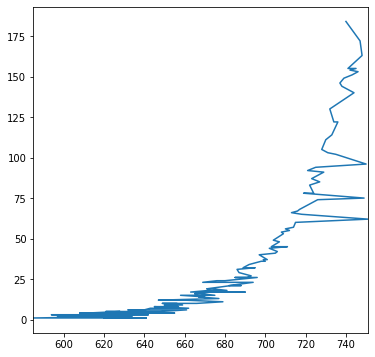

In [19]:
# Посмотрим на графике зависимость кредитного рейтинга от количества человек
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
x.plot()
plt.show()

In [20]:
# Можно заметить, что явного преобладания какого либо рейтинга нет. Можно предположить, что люди без рейтинга
# не брали кредит и не имеют рейтинга. При отсутствии рейтинга у трети заемщиков, использование этого показателя
# вызывает сомнения. Пока заменим пустые значения 0.

In [21]:
# Заменим пропуски на 0
df_train.loc[df_train['Credit Score'].isnull(), 'Credit Score'] = 0

In [22]:
# Сменим тип данных
df_train['Credit Score'] = df_train['Credit Score'].astype(int)

In [23]:
df_train['Credit Score'].value_counts()

0      1557
740     184
747     172
748     163
745     155
       ... 
630       1
631       1
619       1
607       1
586       1
Name: Credit Score, Length: 161, dtype: int64

In [24]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [25]:
# Заменим пропуски на moda
df_train.loc[df_train['Bankruptcies'].isnull(), 'Bankruptcies'] = df_train['Bankruptcies'].mode()[0]

In [26]:
# Сменим тип данных
df_train['Bankruptcies'] = df_train['Bankruptcies'].astype(int)

In [27]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [28]:
# Заменим пропуски на 10+ years, как наиболее часто встречающееся
df_train.loc[df_train['Years in current job'].isnull(), 'Years in current job'] = '10+ years'

In [29]:
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

**Обзор номинативных признаков**

In [30]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Приведение типов

In [31]:
# Переведем float в int
for colname in ['Number of Open Accounts', 'Number of Credit Problems', 'Years of Credit History',
                'Tax Liens', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance',
               'Monthly Debt']:
    df_train[colname] = df_train[colname].astype(int)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   7500 non-null int64
Years in current job            7500 non-null object
Tax Liens                       7500 non-null int64
Number of Open Accounts         7500 non-null int64
Years of Credit History         7500 non-null int64
Maximum Open Credit             7500 non-null int64
Number of Credit Problems       7500 non-null int64
Months since last delinquent    7500 non-null int64
Bankruptcies                    7500 non-null int64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null int64
Current Credit Balance          7500 non-null int64
Monthly Debt                    7500 non-null int64
Credit Score                    7500 non-null int64
Credit Default                  7500 non-null int64
dtype

In [33]:
# Заменим Long Term на 1 и Short Term на 0 и тип на int
df_train['Term'] = (df_train['Term'] == 'Long Term').astype(int)
df_train['Term'].value_counts()

0    5556
1    1944
Name: Term, dtype: int64

### Построение новых признаков

**Id**

In [34]:
df_train['ID'] = df_train.index.tolist()

**Dummies**

In [35]:
for cat_colname in df_train.select_dtypes(include='object').columns[:]:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[cat_colname], prefix=cat_colname)], axis=1)

**Обзор количественных признаков**

In [36]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000
mean,1.325286e+06,0.030133,11.130933,17.889333,9.451537e+05,0.170000,23.433067,0.116933,0.259200,1.187318e+07,...,0.054933,0.005333,0.009467,0.001467,0.088667,0.000267,0.003467,0.004933,0.001067,0.00200
std,7.567551e+05,0.271604,4.908924,7.050672,1.602622e+07,0.498598,17.906245,0.346904,0.438225,3.192612e+07,...,0.227865,0.072840,0.096842,0.038272,0.284281,0.016329,0.058780,0.070069,0.032645,0.04468
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.124200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.311330e+05,0.000000,8.000000,13.000000,2.792295e+05,0.000000,14.000000,0.000000,0.000000,1.801690e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,14.000000,0.000000,0.000000,3.095730e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.499974e+06,0.000000,14.000000,21.000000,7.935015e+05,0.000000,29.000000,0.000000,1.000000,5.198820e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.014934e+07,7.000000,43.000000,57.000000,1.304726e+09,7.000000,118.000000,4.000000,1.000000,1.000000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 48 columns):
Home Ownership                    7500 non-null object
Annual Income                     7500 non-null int64
Years in current job              7500 non-null object
Tax Liens                         7500 non-null int64
Number of Open Accounts           7500 non-null int64
Years of Credit History           7500 non-null int64
Maximum Open Credit               7500 non-null int64
Number of Credit Problems         7500 non-null int64
Months since last delinquent      7500 non-null int64
Bankruptcies                      7500 non-null int64
Purpose                           7500 non-null object
Term                              7500 non-null int64
Current Loan Amount               7500 non-null int64
Current Credit Balance            7500 non-null int64
Monthly Debt                      7500 non-null int64
Credit Score                      7500 non-null int64
Credit Default            

In [38]:
# Удалим значения типа object
# df_train.drop(['Home Ownership', 'Years in current job', 'Purpose'], axis='columns', inplace=True)

In [39]:
# df_train.info()

**Сохраним полученный датасет**

In [40]:
df_train.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

### Анализ данных

**Выделение целевой переменной и групп признаков**

In [85]:
df_base = pd.read_csv(TRAIN_DATASET_PATH)
df_train = pd.read_csv(PREP_DATASET_PATH)

df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,Own Home,482087,10+ years,0,11,26,685960,1,14,1,...,0,0,0,0,0,0,0,0,0,0
1,Own Home,1025487,10+ years,0,15,15,1181730,0,14,0,...,0,0,0,0,0,0,0,0,0,0
2,Home Mortgage,751412,8 years,0,11,35,1182434,0,14,0,...,0,0,0,0,0,0,0,0,0,0
3,Own Home,805068,6 years,0,8,22,147400,1,14,1,...,0,0,0,0,0,0,0,0,0,0
4,Rent,776264,8 years,0,13,13,385836,1,14,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_base.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [87]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [88]:
BASE_FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [89]:
NEW_FEATURE_NAMES

Index(['ID', 'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Years in current job_1 year', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Purpose_business loan',
       'Purpose_buy a car', 'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

**Обзор целевой переменной**

In [90]:
df_train[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

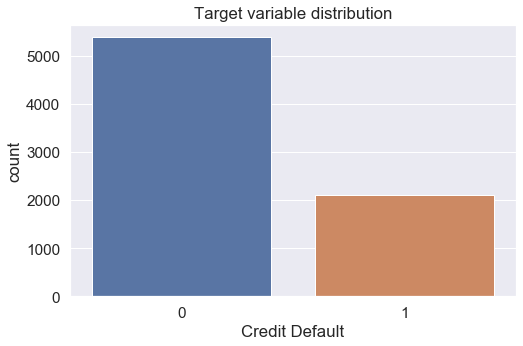

In [91]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

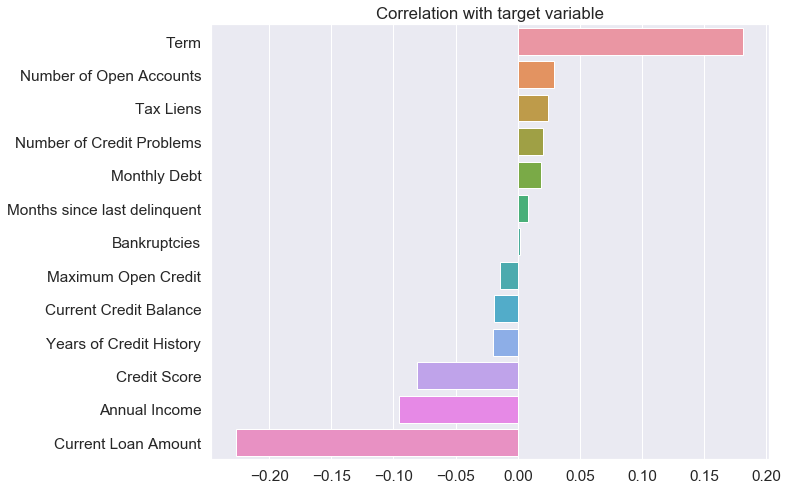

In [92]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Корреляция с новыми признаками**

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 48 columns):
Home Ownership                    7500 non-null object
Annual Income                     7500 non-null int64
Years in current job              7500 non-null object
Tax Liens                         7500 non-null int64
Number of Open Accounts           7500 non-null int64
Years of Credit History           7500 non-null int64
Maximum Open Credit               7500 non-null int64
Number of Credit Problems         7500 non-null int64
Months since last delinquent      7500 non-null int64
Bankruptcies                      7500 non-null int64
Purpose                           7500 non-null object
Term                              7500 non-null int64
Current Loan Amount               7500 non-null int64
Current Credit Balance            7500 non-null int64
Monthly Debt                      7500 non-null int64
Credit Score                      7500 non-null int64
Credit Default            

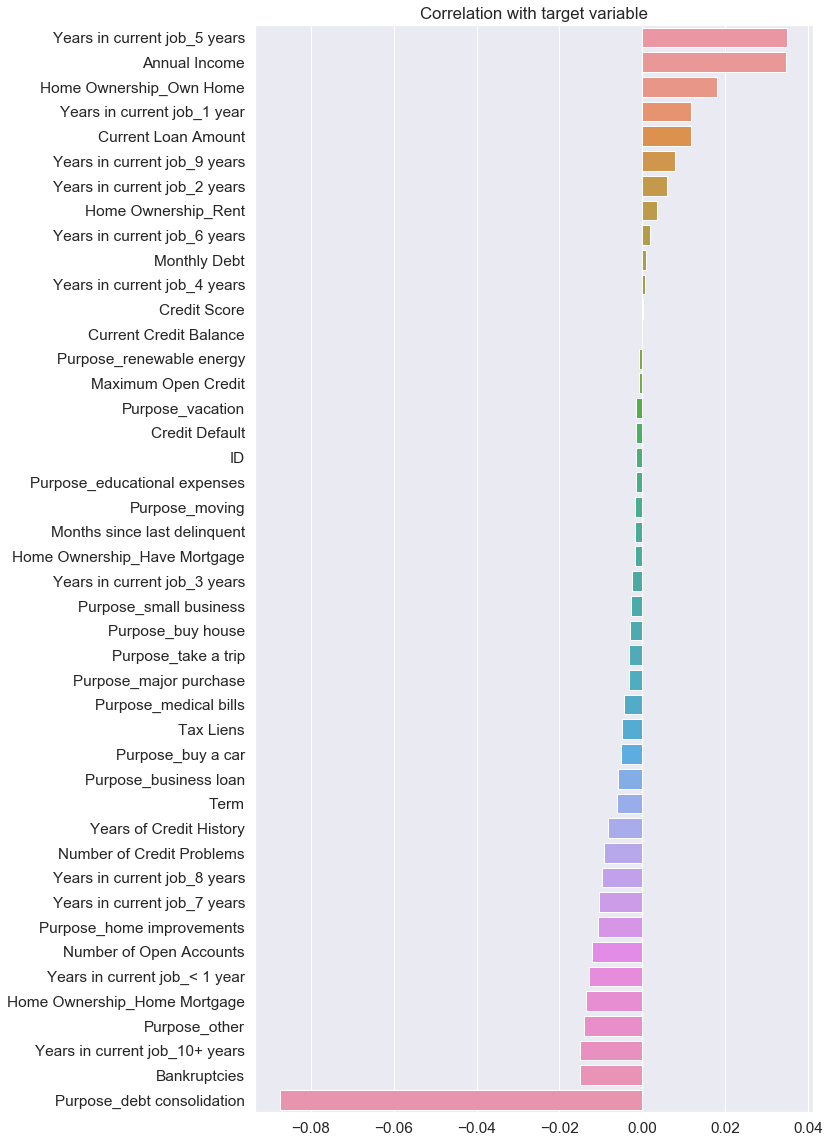

In [96]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 20))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "Current Loan Amount" в разрезе целевой переменной**

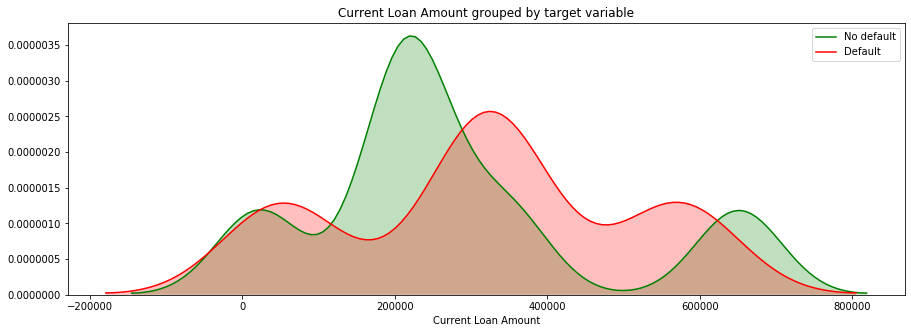

In [59]:
limit_bal_with_target_s = df_train[['Current Loan Amount', TARGET_NAME]].sample(10)
limit_bal_s = limit_bal_with_target_s['Current Loan Amount']
limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(15, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.show()

In [61]:
# Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка
from scipy.stats import shapiro
shapiro(limit_bal_s)

(0.9288809299468994, 0.4369756877422333)

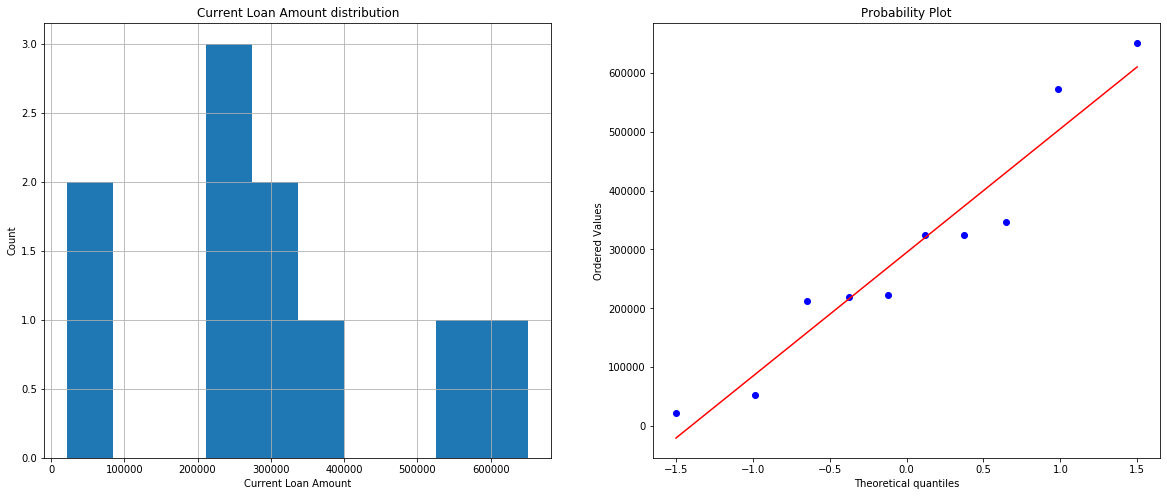

In [63]:
# Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график

from scipy.stats import probplot

plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Current Loan Amount')
ax1.set_ylabel('Count')
ax1.set_title('Current Loan Amount distribution')
limit_bal_s.hist()

plt.subplot(122)
probplot(limit_bal_s, dist='norm', plot=plt)

plt.show()

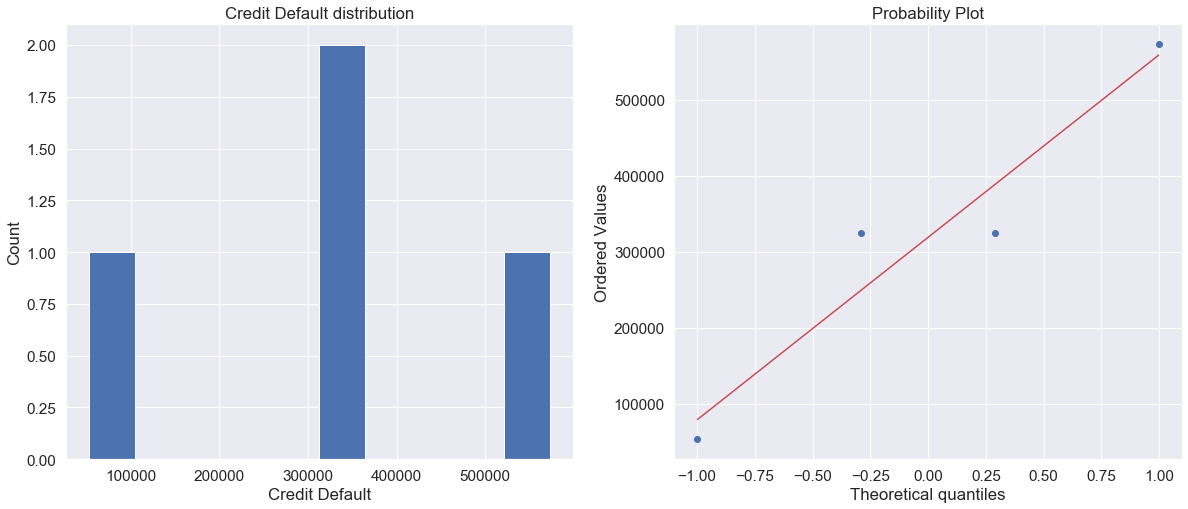

In [106]:
from scipy.stats import probplot

plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Credit Default')
ax1.set_ylabel('Count')
ax1.set_title('Credit Default distribution')
limit_bal_target_1.hist()

plt.subplot(122)
probplot(limit_bal_target_1, dist='norm', plot=plt)

plt.show()

In [64]:
# Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни

from scipy.stats import mannwhitneyu

mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=10.0, pvalue=0.37455956650029765)

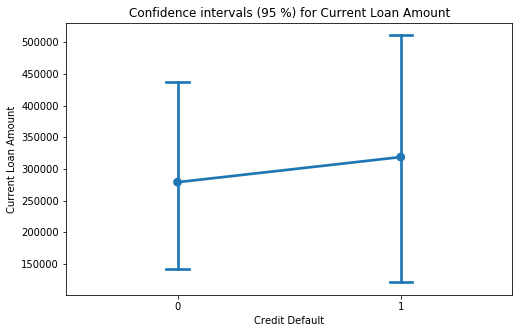

In [65]:
# Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их

plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=limit_bal_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Current Loan Amount')
plt.show()

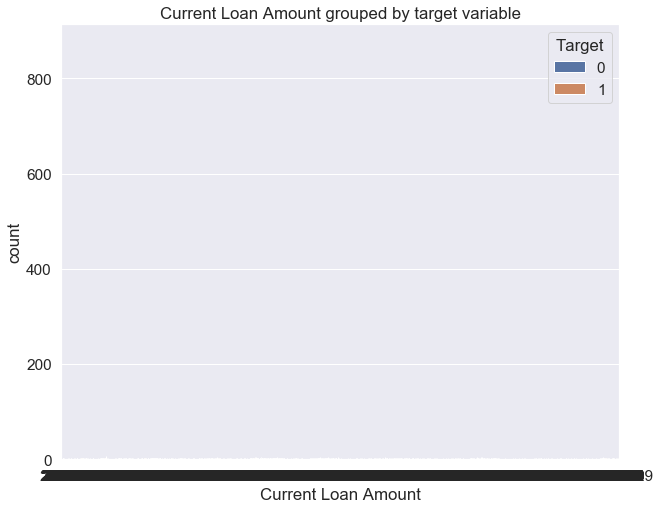

In [108]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Current Loan Amount", hue=TARGET_NAME, data=df_train)
plt.title('Current Loan Amount grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

### Анализ признакового пространства

**Матрица корреляций**

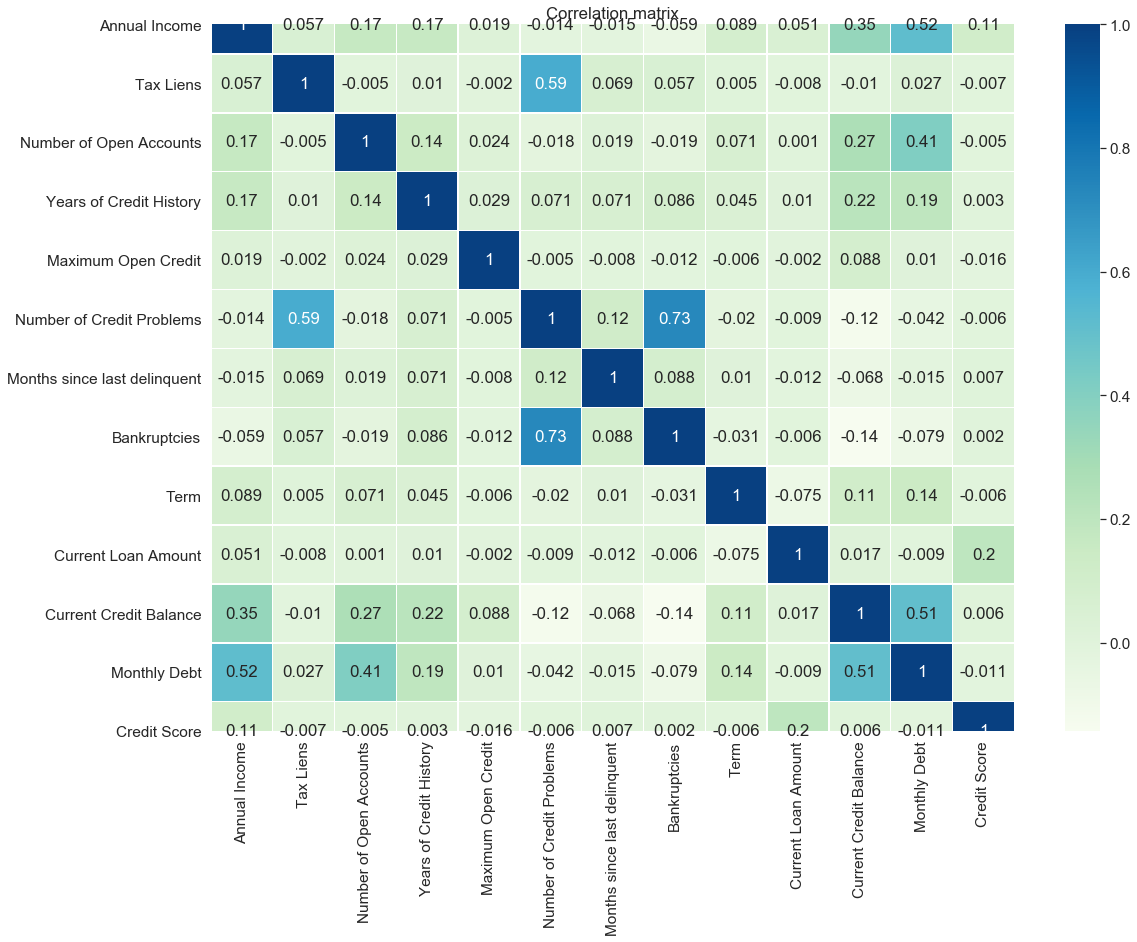

In [80]:
plt.figure(figsize = (18,13))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

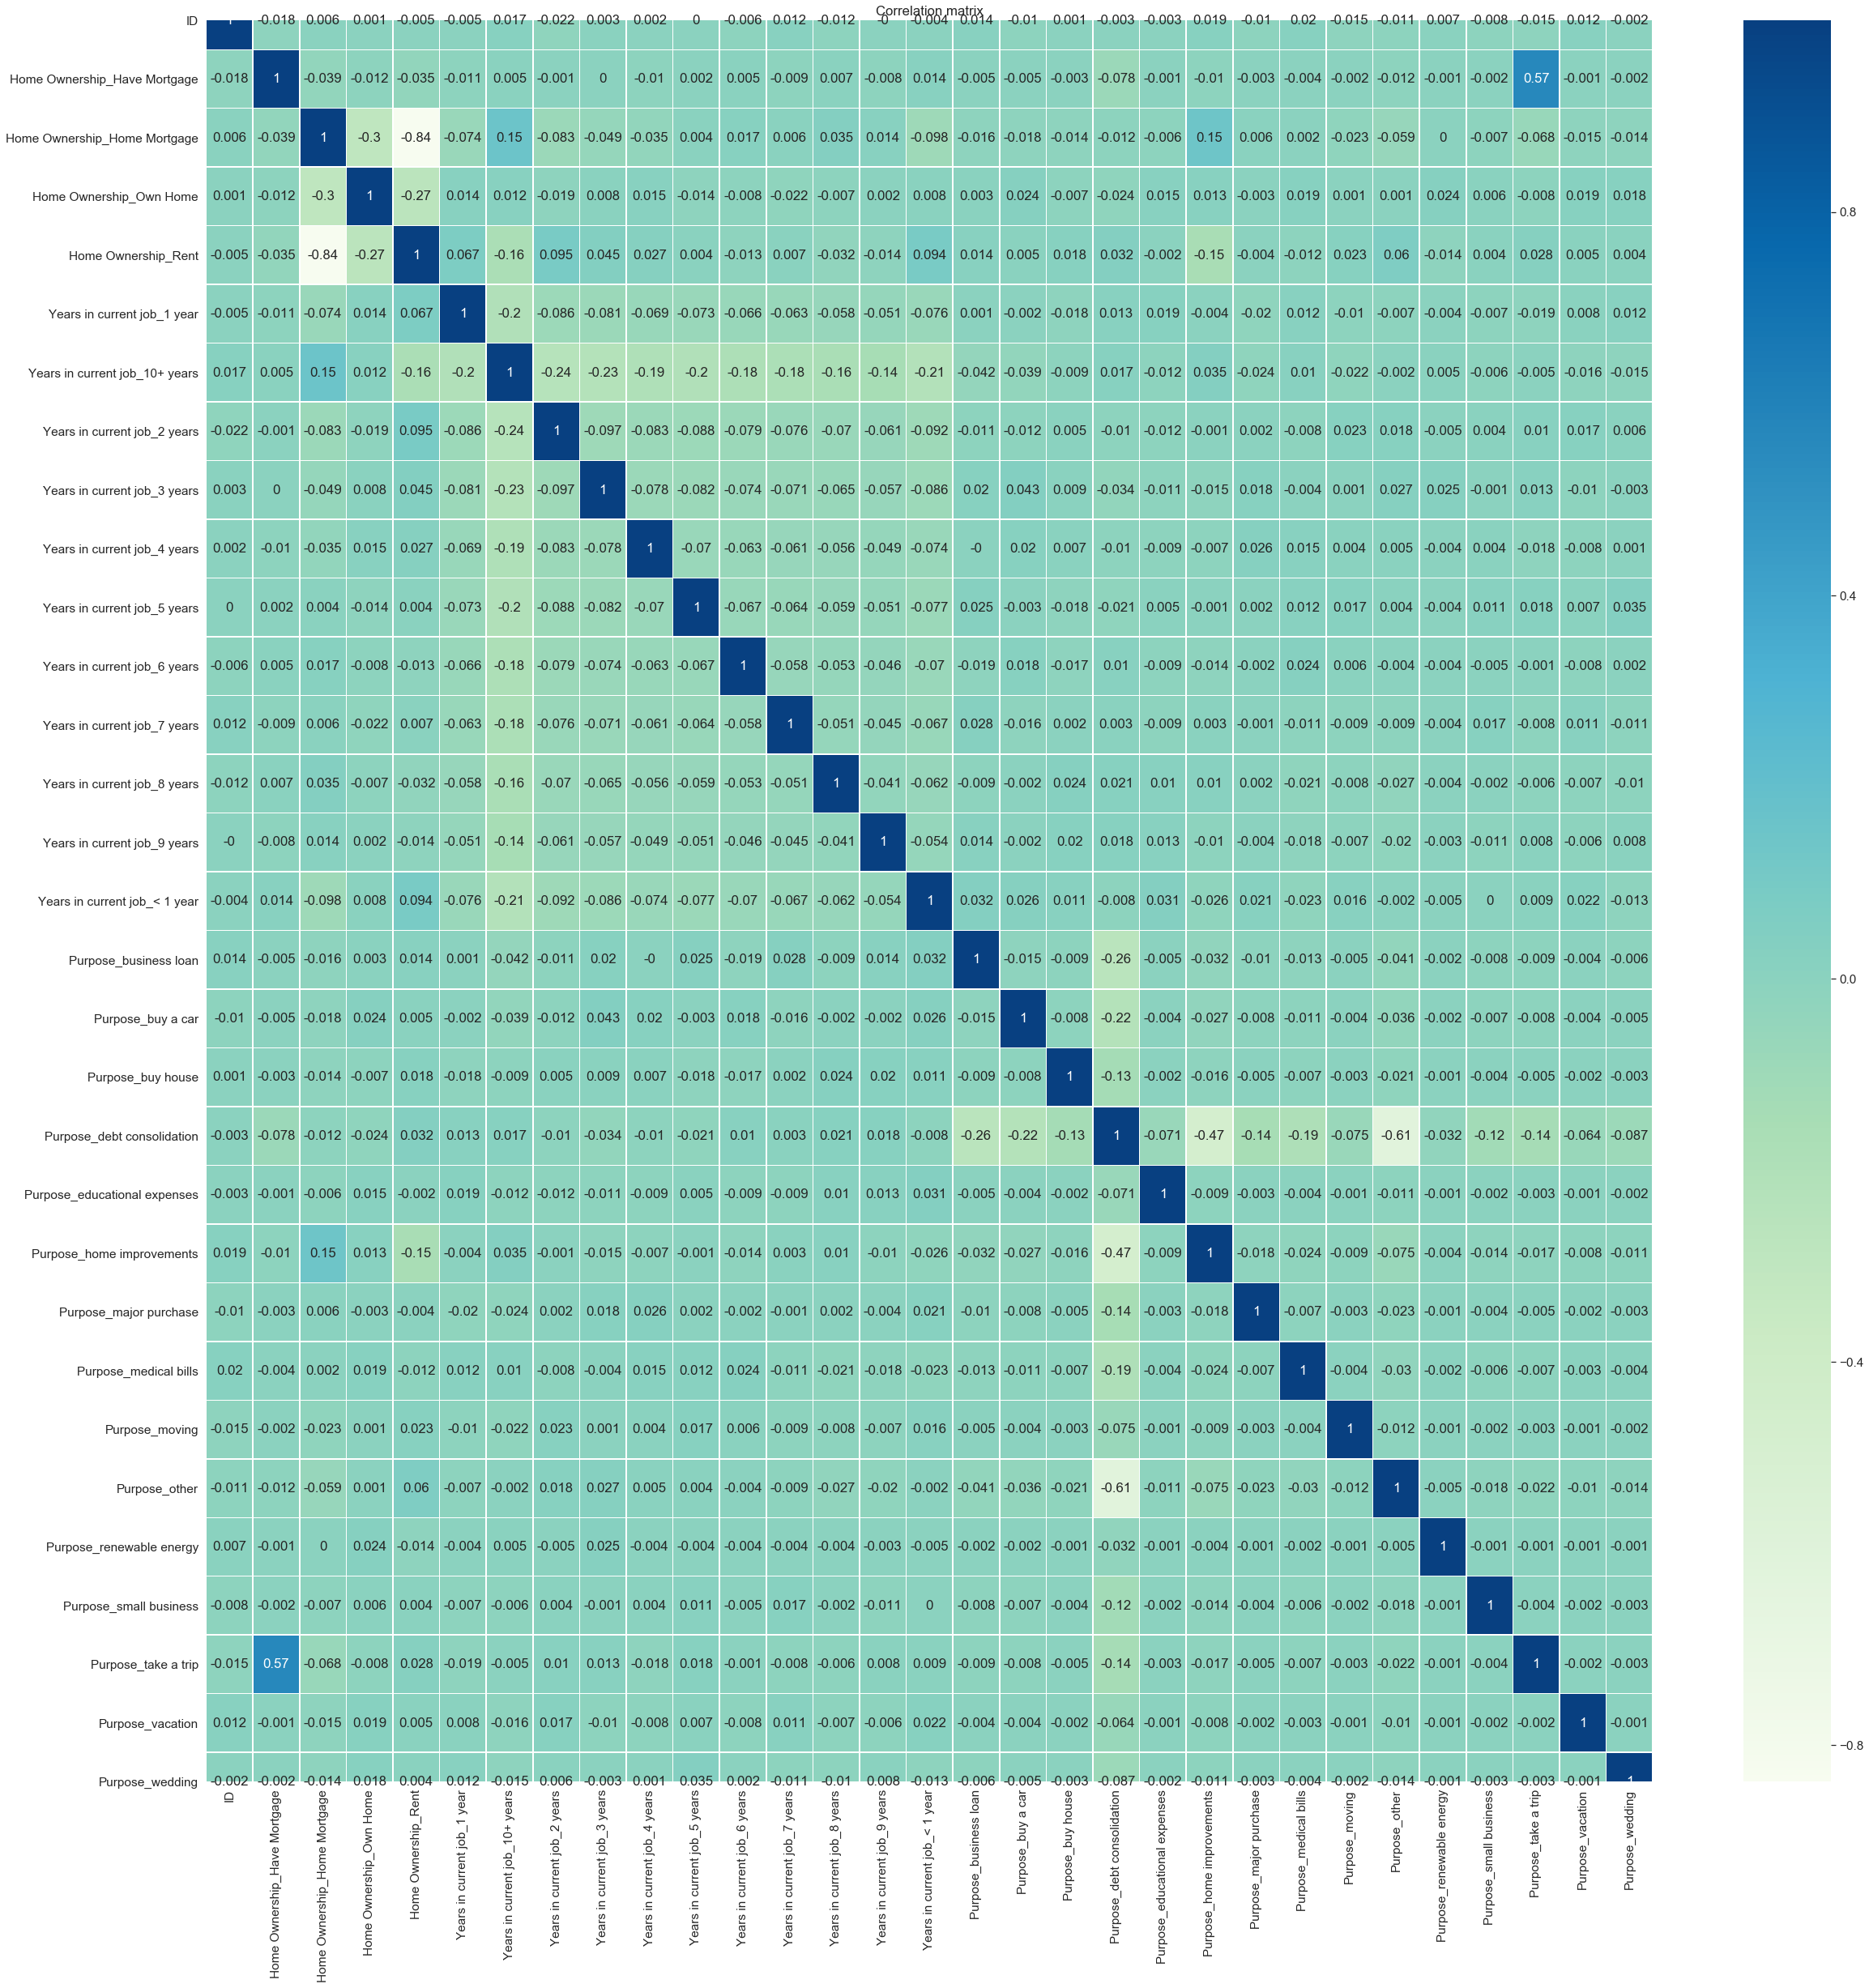

In [102]:
plt.figure(figsize = (40,40))

sns.set(font_scale=1.4)
sns.heatmap(df_train[NEW_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Построение модели классификации

### Отбор признаков

### Балансировка классов

### Подбор моделей, получение бейзлана

### Выбор наилучшей модели, настройка гиперпараметров

### Проверка качества, борьба с переобучением

### Интерпретация результатов

## Прогнозирование на тестовом датасете

### Загрузка данных

### Приведение типов

### Обработка выбросов

### Обработка пропусков

### Анализ данных

### Отбор признаков

### Балансировка классов

### Прогноз целевой переменной, используя модель, построенную на обучающем датасете